## Exploratory Data Analysis

1. Data Overview

- **Goal**: Understand the structure of the dataset, including the number of rows, columns, and data types.

- **Key Steps:** Load the data and print a concise summary of the dataset using `.info()` and `.head()`.

In [1]:
#Import necessary libraries
import pandas as pd
import logging
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Import load_data module
from load_data import load_data

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import setup_logger
logger = setup_logger()

logger.info("Imported necessary libraries.")

2024-10-06 08:12:36,195 - INFO - Imported necessary libraries.


Load the dataset

In [2]:
logger.info("Data loading initiated.")
df = load_data('../data/data.csv')  # Assume load_data() is your function
logger.info("Data loaded successfully.")

2024-10-06 08:12:36,231 - INFO - Data loading initiated.
2024-10-06 08:12:37,274 - INFO - Data loaded successfully.


Data successfully loaded from ../data/data.csv
Dataset contains 95662 rows and 15 columns.



1. **Data overview**:

- Provide an overview of the dataset including shape, data types, missing values, and first few rows.

In [3]:
# Import the class CreditRiskEDA
from credit_risk_eda import CreditRiskEDA
# Initialize the class
cr_eda = CreditRiskEDA(df)
# Logging activity
logger.info("Data overview initiated.")

# Overview of the dataset
if not df.empty:
    cr_eda.data_overview()

logger.info("Data overview successfully completed.")


2024-10-06 08:12:44,145 - INFO - Data overview initiated.


Data Overview:
Number of rows: 95662
Number of columns: 15

Column Data Types:
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First Five Rows:


,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


2024-10-06 08:12:44,296 - INFO - Data overview successfully completed.



Missing Values Overview:
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


**Data Overview Summary**

- The dataset contains 95,662 rows and 15 columns, providing a substantial amount of data for analysis.

- The data types are generally correct, except for the `TransactionStartTime` column, which is currently stored as an object. This column should be converted to datetime format for accurate time-based analysis.

- No missing values were detected in any of the columns, ensuring the dataset is complete and ready for further analysis without the need for imputation.

In [4]:
# Convert the TransactionStartTime to appropriate datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

**Identify Duplicates**

Use the `duplicated()` method to identify rows that are duplicates based on the relevant columns.

In [5]:
# Identify duplicates based on specific columns
# Identify duplicates based on specified columns
duplicate_rows = df[df.duplicated(subset=['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 
                                           'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 
                                           'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 
                                           'PricingStrategy', 'FraudResult'], keep=False)]
duplicate_rows.shape


(317, 15)

In [6]:
# Keep the first occurrence of duplicates
df_cleaned = df.drop_duplicates(subset=['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 
                                          'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 
                                          'ProductCategory', 'ChannelId', 'Amount', 'Value', 
                                          'TransactionStartTime', 'PricingStrategy', 'FraudResult'], 
                                 keep='first')


In [7]:
df_cleaned.shape

(95475, 15)

In [8]:
# Comfirm that there is no duplicates 
df_cleaned[df_cleaned.duplicated()]

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
TransactionId,,,,,,,,,,,,,,,


In [9]:
df = df_cleaned.copy()
df.shape

(95475, 15)

**2. Summary Statistics**

- Understand the central tendency, dispersion, and shape of the dataset’s distribution.


In [10]:
# Log the start of the summary statistics process
logger.info("Generating summary statistics for numeric columns...")   

# Statistical summary
summary_stats = cr_eda.summary_statistics()
display(summary_stats.T)
# Log completion
logger.info("Summary statistics generation completed.")

2024-10-06 08:12:45,526 - INFO - Generating summary statistics for numeric columns...


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000
median,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
mode,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000


2024-10-06 08:12:45,601 - INFO - Summary statistics generation completed.


**Observations:**

- The `CountryCode` is constant at `256`, indicating no variability in this column.
- The `Amount` and `Value` features show a high degree of skewness (both over 51), indicating potential outliers or heavy-tailed distributions.

- `PricingStrategy` is fairly stable with most values centered around 2.

- `FraudResult` has a very low mean, indicating a low occurrence of fraudulent transactions, with a highly positive skewness suggesting a majority of zeros.

**Distribution of Numerical Features**

- Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


2024-10-06 08:12:45,638 - INFO - Plot Numberical Distribution...


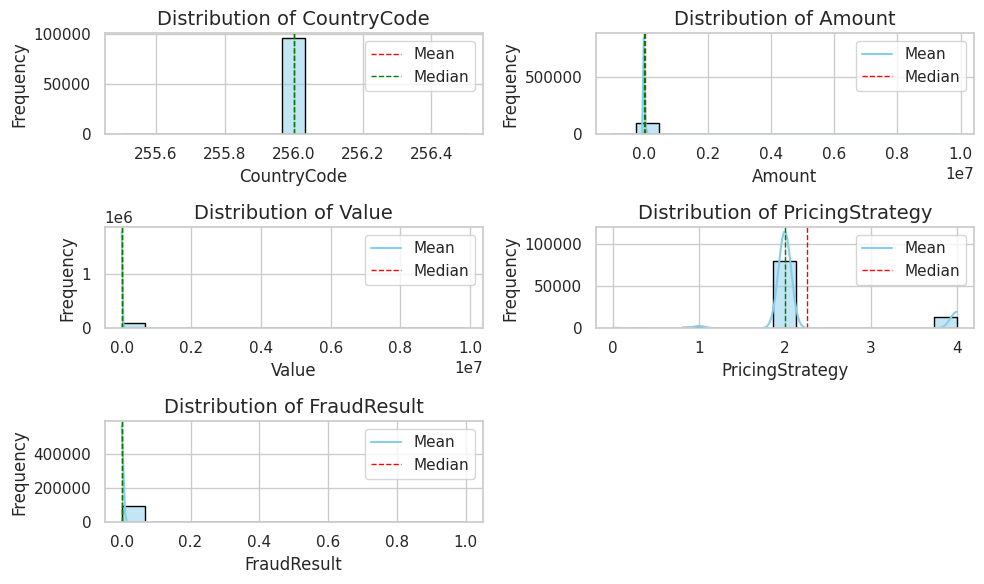

2024-10-06 08:12:51,943 - INFO - The distribution plot successfully completed.


In [11]:
# Logger activity
logger.info("Plot Numberical Distribution...")
# List of numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot distibution
cr_eda.plot_numerical_distribution(numeric_cols)
logger.info("The distribution plot successfully completed.")

**Key insights:**

- Most of the numerical features exhibit right-skewness, indicating that there are a few extreme values that pull the mean to the right.

- The distributions of CountryCode, Amount, and Value have clear peaks, suggesting common values or ranges.

- The distribution of PricingStrategy has a clear peak at 2, indicating a preferred pricing strategy.

- The distribution of FraudResult shows a majority of non-fraudulent transactions.


**Skewness:**

- Visualize the skewness of numerical features


2024-10-06 08:12:51,977 - INFO - Visualizing Skewness of numercial features...


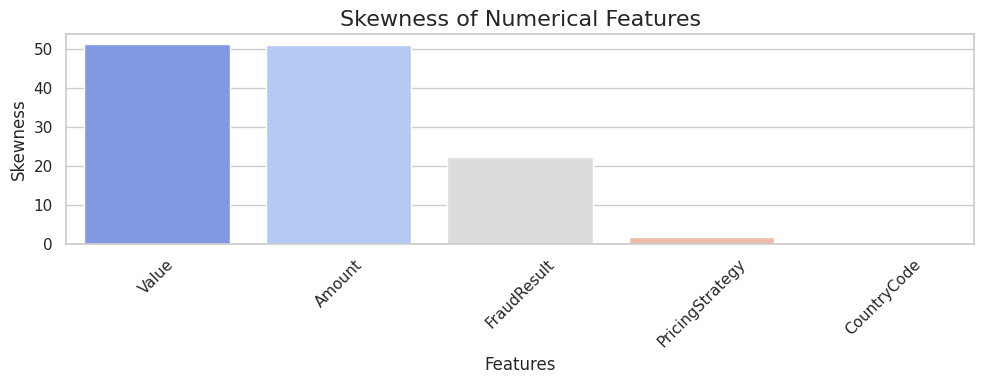

2024-10-06 08:12:52,425 - INFO - Visualization successfully completed.


In [12]:
# Logger activity
logger.info("Visualizing Skewness of numercial features...")
if not df.empty:
    cr_eda.plot_skewness()
logger.info("Visualization successfully completed.")


Key Insights:

- `CountryCode`: This feature remains constant (256) across all entries, indicating the data pertains to a single geographical region. Since there is no variability in this feature, it will not contribute to model performance and can be considered for removal in subsequent analysis.

- `Amount`: The distribution of the transaction amount is highly right-skewed with extreme outliers, as indicated by a skewness value of over 51. This suggests that a few transactions have significantly higher amounts than the rest. Such skewness can distort the model's learning process, so normalization or transformation (e.g., log transformation) may be necessary to handle these extreme values.

- `Value`: The absolute value of transactions shows a similar pattern to Amount, with a high degree of skewness. The presence of large outliers implies that these transactions have a disproportionate effect on the overall data. Addressing this skewness through appropriate scaling will help balance the data for better model performance.

- `PricingStrategy`: The data shows a preference for a specific pricing strategy (category 2), which dominates the distribution. This could indicate a business preference or customer inclination toward that pricing strategy. However, there is less skewness here, suggesting that the distribution is more balanced compared to other features.

- `FraudResult`: Fraudulent transactions are extremely rare, as evidenced by the mean close to zero and the right-skewness of over 22. This class imbalance may lead to model bias toward predicting non-fraudulent transactions. Addressing this imbalance through techniques like oversampling the fraud cases or employing specialized algorithms may be required to ensure the model effectively captures fraudulent behavior.

**Distribution of Categorical Features**

- Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.


2024-10-06 08:12:52,440 - INFO - Visualizing the distribution of useful categorical features...


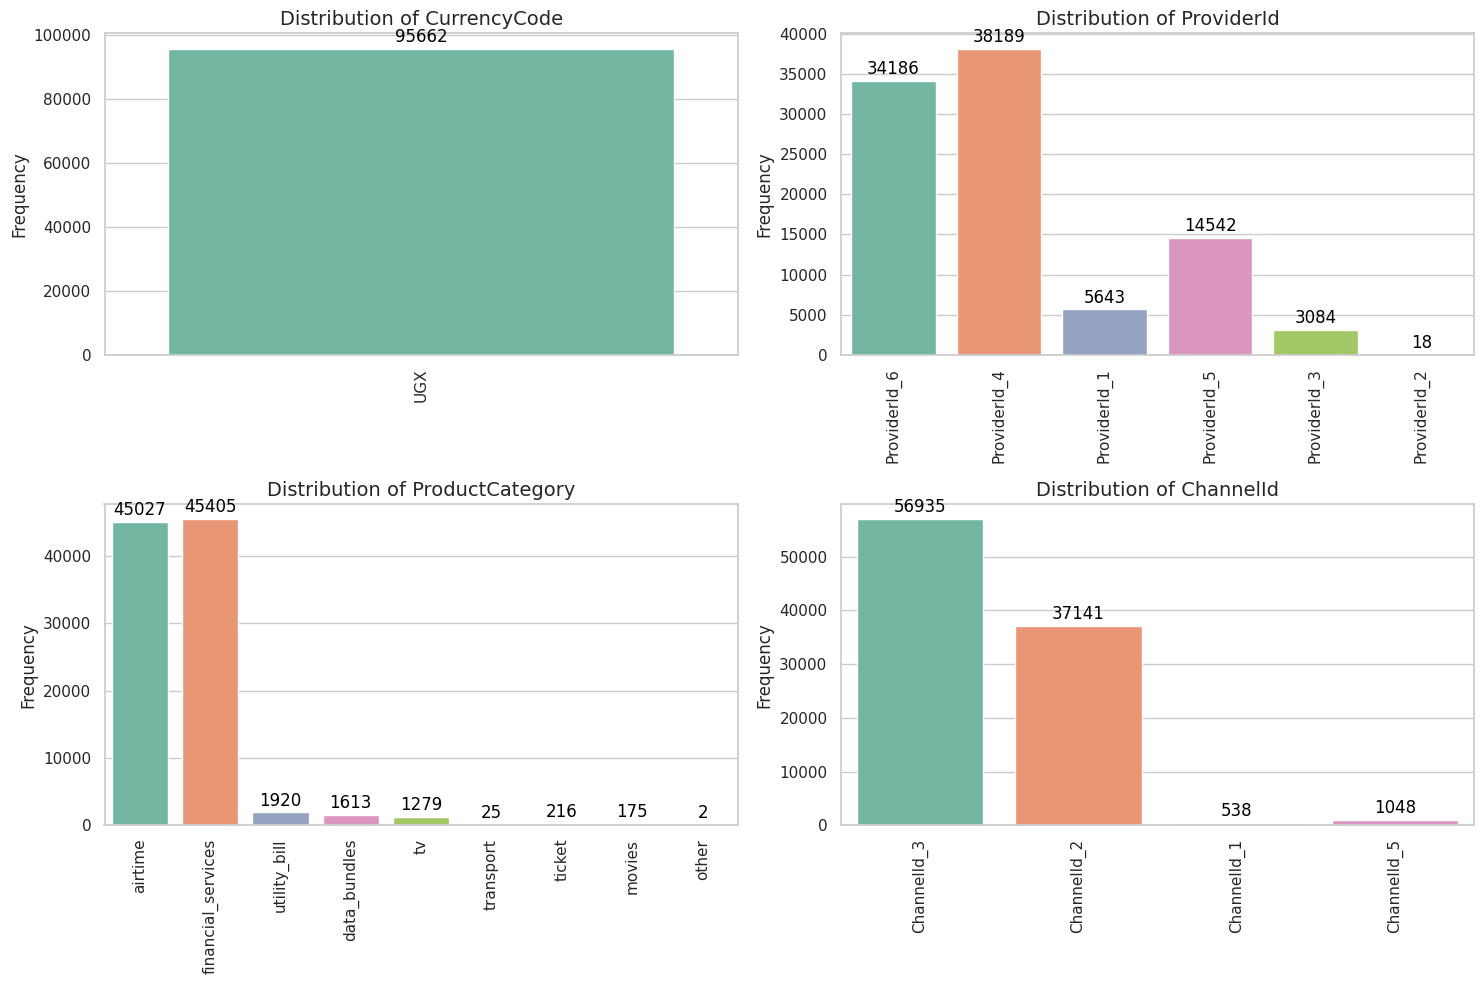

2024-10-06 08:12:56,283 - INFO - Distribution plot successfully completed.


In [13]:
logger.info('Visualizing the distribution of useful categorical features...')
if not df.empty:
    cr_eda.plot_categorical_distribution()
logger.info('Distribution plot successfully completed.')

**Key Insights from Categorical Features:**

**CurrencyCode:**

The dataset is dominated by a single currency, UGX (Ugandan Shilling), which is the currency for all transactions. This uniformity indicates that the platform primarily handles transactions within Uganda. Since **CurrencyCode** is uniform across the entire dataset (with only UGX as the value), it does not provide any variability or discriminative power for future model training. As a result, it would not contribute meaningfully to the predictive model and can be excluded from the feature set during model development. 

**ProviderId:**

Two providers, ProviderId_6 and ProviderId_4, handle the majority of transactions, with counts of 34,186 and 38,189 respectively. This suggests a concentrated reliance on these providers for most services.
Other providers have much smaller transaction volumes, with ProviderId_1 and ProviderId_5 contributing some, while ProviderId_2 has an almost negligible number of transactions.

**ProductCategory:**

Two product categories, airtime (45,027) and financial_services (45,405), dominate the dataset. These are clearly the most popular categories, suggesting a focus on telecom and financial services transactions.
Other categories like utility_bill, data_bundles, and tv have significantly fewer transactions, indicating less customer demand or offering.

**ChannelId:**

The majority of transactions were made through ChannelId_3 (56,935) and ChannelId_2 (37,141), indicating these are the most popular channels.
Other channels, such as ChannelId_1 and ChannelId_5, are used much less frequently.

**Correlation Analysis**

- Understanding the relationship between numerical features.


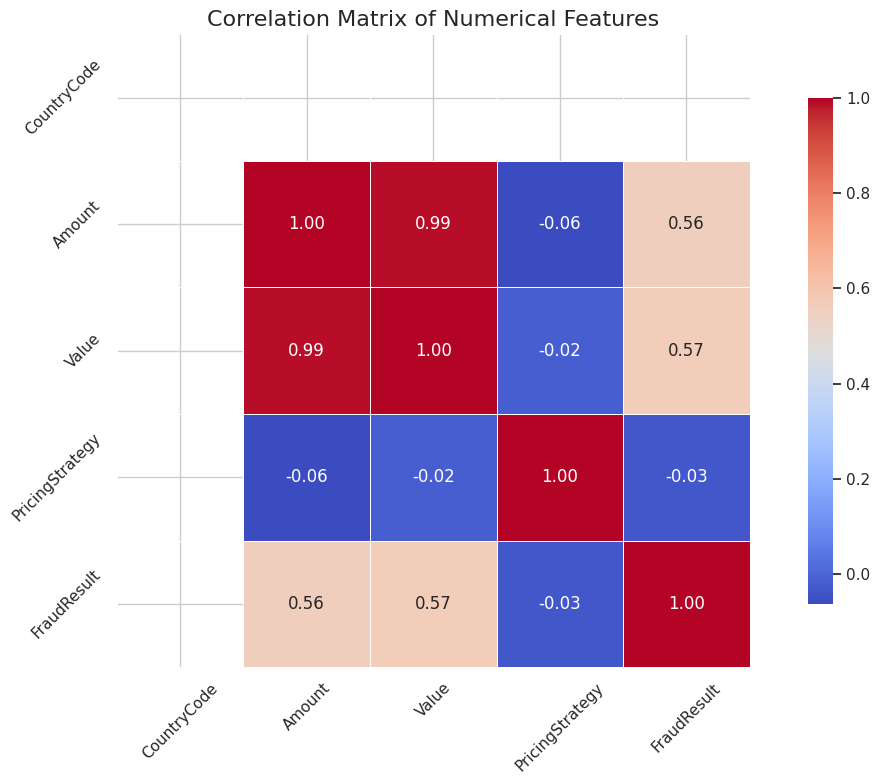

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Title and labels
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

- Amount and Value has strong positive correlation since they provide the same information. Value has no significance for future modeling

- Amount and FraudResults has moderate correlation

- PricingStrategy and Other features has no correlation


**Outlier Detection**

- Use box plots to identify outliers.


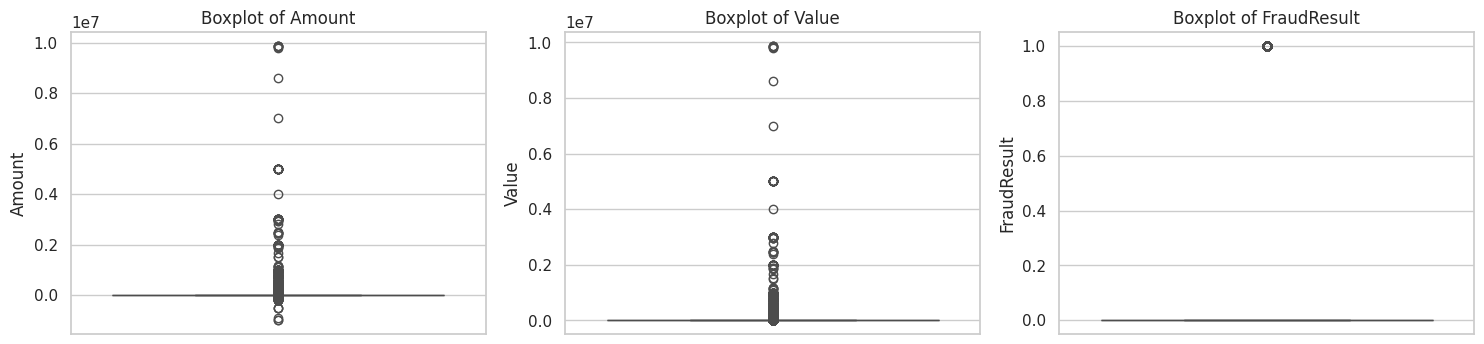

In [15]:
cr_eda.detect_outliers(['Amount', 'Value', 'FraudResult'])

The box plots show the distribution of numerical features along with the outliers:


- **Amount and Value:** Both show significant numbers of outliers, particularly with high transaction values. These outliers could represent extreme transaction cases or potential fraudulent activity, requiring further investigation or possible scaling during preprocessing.

- **FraudResult:** Outliers here are limited, likely because this is a binary variable, but it is crucial to note the imbalanced nature of fraud occurrences.

**Recommendations:**

- **Handling Outliers:** Consider applying robust scaling methods or transformations like logarithmic scaling to normalize the distribution of Amount and Value.

**Boxplot of Transaction Amounts for Fraud and Non-Fraud Transactions**

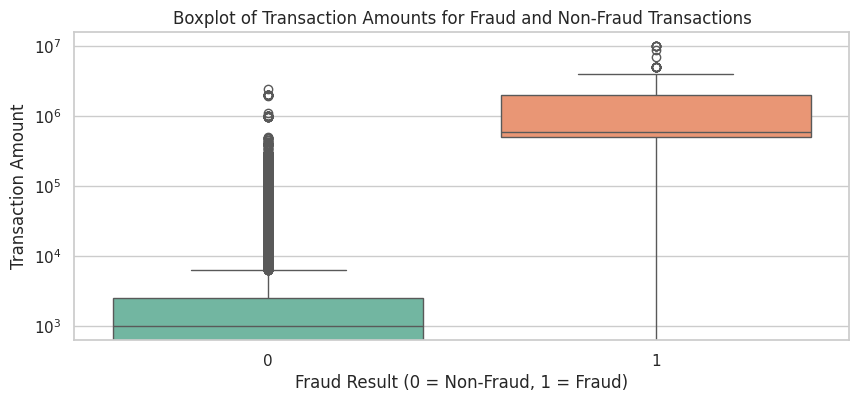

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a plot to visualize the relationship between Amount and FraudResult
plt.figure(figsize=(10, 4))

# Plotting boxplot to compare Amount for FraudResult = 1 (fraudulent) and FraudResult = 0 (non-fraudulent)
sns.boxplot(x='FraudResult', y='Amount', hue='FraudResult', legend=False,data=df, palette="Set2")

plt.title('Boxplot of Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraud Result (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Using log scale to handle the large range of amounts

plt.show()


**Cross-tabulate Fraud with Amount Ranges**

- Divide the **Amount** variable into ranges (bins) and create a cross-tabulation with FraudResult. This will show how often high-value transactions (those in the top bins) are labeled as frauds.


FraudResult      0    1  Total
AmountRange                   
<1K          23845    1  23846
1K-5K        17275    0  17275
5K-10K       10020    0  10020
10K-50K       4840    3   4843
50K-100K       639    9    648
>100K          479  175    654
Total        57098  188  57286


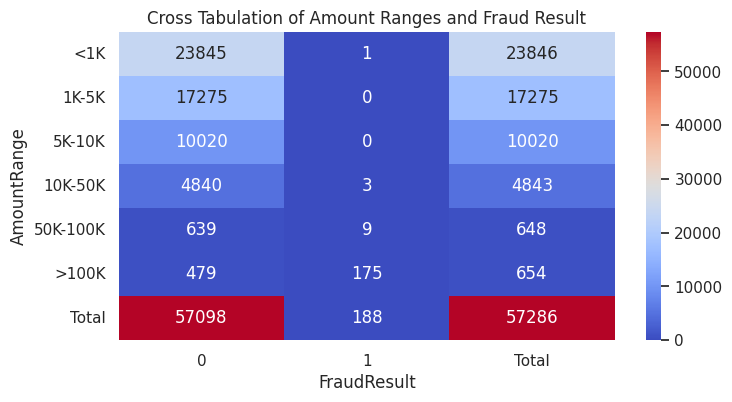

In [17]:
# Define bins for Amount ranges
bins = [0, 1000, 5000, 10000, 50000, 100000, df['Amount'].max()]
labels = ['<1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '>100K']
df_new = df.copy()
# Create a new column with binned Amount
df_new['AmountRange'] = pd.cut(df_new['Amount'], bins=bins, labels=labels, include_lowest=True)

# Create a cross-tabulation
cross_tab = pd.crosstab(df_new['AmountRange'], df_new['FraudResult'], margins=True, margins_name="Total")
print(cross_tab)

# Optional: Visualize the cross-tabulation with a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='g')
plt.title('Cross Tabulation of Amount Ranges and Fraud Result')
plt.show()


**Key insights from the cross-tabulation**

1. Low-value transactions (<1K): Nearly all transactions in this range are non-fraudulent, suggesting low risk.

2. Medium-value transactions (1K-50K): Mid-range transactions also show low fraud rates, with just 3 frauds in the 10K-50K range.

3. High-value transactions (50K-100K): Fraud increases to about 1.39% in this range, indicating higher risk.
    
4. Very high-value transactions (>100K): Around 26.7% of these transactions are fraudulent, showing a strong link between large amounts and fraud.

- Outliers should be retained, as they highlight a significant fraud risk in high-value transactions.
- The model could be refined to place more emphasis on high-value transactions, where fraud is more prevalent.

## Feature Engineering

A Python class for feature engineering that encapsulates the processes of creating **aggregate features**, **extracting features**, **encoding categorical variables**, **handling missing values**, and **normalizing/standardizing numerical features**.

In [18]:
# Import the python class
from feature_engineering import FeatureEngineering

# Instantiate the FeatureEngineering class
feature_engineer = FeatureEngineering()

In [19]:
if __name__=='__main__':
    # Create aggregate features
    df_copy = df.copy().reset_index()
    # Identify columns to exclude, and categorical columns to encode
    # Columns to drop
    cols_to_drop = ['ProductId', 'BatchId',	'AccountId','ProviderId', 'SubscriptionId', 'Value','CountryCode','CurrencyCode']
    # Categorical features
    cat_features = ['ProductCategory', 'ChannelId']

    df_copy.drop(columns=cols_to_drop, inplace=True)
    
    agg_features = feature_engineer.create_aggregate_features(df_copy)

    # Extract time features
    df_with_time_features = feature_engineer.extract_time_features(agg_features)

    # Encode categorical features
    df_encoded = feature_engineer.encode_categorical_features(df_with_time_features, cat_features)

    # Handle missing values
    df_cleaned = feature_engineer.handle_missing_values(df_encoded)

    # Normalize numerical features
    numeric_cols = df_encoded.select_dtypes(include='number').columns
    exclude_cols = ['Amount', 'FraudResult']  # Replace with the actual column names you want to exclude
    numeric_cols = numeric_cols.difference(exclude_cols)

    df_normalized = feature_engineer.normalize_numerical_features(df_encoded, numeric_cols, method='standardize')


In [20]:
# Display the results
df_normalized

,CustomerId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,CustomerId_4406,-0.799930,0.747877,1000.0,2018-11-15 02:18:49+00:00,-0.349631,0.0,0.170419,-0.067590,-0.311761,-0.168633,-2.155409,-0.100920,0.849087,-0.994641
TransactionId_73770,CustomerId_4406,0.491217,-1.173175,-20.0,2018-11-15 02:19:08+00:00,-0.349631,0.0,0.170419,-0.067590,-0.311761,-0.168633,-2.155409,-0.100920,0.849087,-0.994641
TransactionId_26203,CustomerId_4683,-0.799930,0.747877,500.0,2018-11-15 02:44:21+00:00,-0.349631,0.0,0.165428,-0.072530,-0.444809,-0.202798,-2.155409,-0.100920,0.849087,-0.994641
TransactionId_380,CustomerId_988,4.364659,0.747877,20000.0,2018-11-15 03:32:55+00:00,-0.349631,0.0,0.175863,-0.008180,-0.403871,-0.009989,-1.949093,-0.100920,0.849087,-0.994641
TransactionId_28195,CustomerId_988,0.491217,-1.173175,-644.0,2018-11-15 03:34:21+00:00,-0.349631,0.0,0.175863,-0.008180,-0.403871,-0.009989,-1.949093,-0.100920,0.849087,-0.994641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TransactionId_89881,CustomerId_3078,0.491217,-1.173175,-1000.0,2019-02-13 09:54:09+00:00,-0.349631,0.0,0.277107,-0.028749,0.204514,0.050482,-0.711195,-0.324009,-0.873673,1.005388
TransactionId_91597,CustomerId_3874,-0.799930,0.747877,1000.0,2019-02-13 09:54:25+00:00,-0.349631,0.0,0.168063,-0.062498,-0.398186,-0.177252,-0.711195,-0.324009,-0.873673,1.005388
TransactionId_82501,CustomerId_3874,0.491217,-1.173175,-20.0,2019-02-13 09:54:35+00:00,-0.349631,0.0,0.168063,-0.062498,-0.398186,-0.177252,-0.711195,-0.324009,-0.873673,1.005388


In [21]:
df_normalized.columns

Index(['CustomerId', 'ProductCategory', 'ChannelId', 'Amount',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year'],
      dtype='object')

In [22]:
# Save extracted and cleaned features to csv
df_normalized.to_csv('../data/extracted_features.csv')

The feature engineering process involved encoding categorical variables with one-hot encoding and standardizing numerical features using the StandardScaler for consistency in scale. During this process, the new feature Std_Transaction_Amount was found to have 712 missing values, which were imputed with the mean to ensure completeness.

## Default estimator and WoE binning 


**RFMS model**

- RFM model is a classic customer stratification model, which uses the three core dimensions of the
general transaction link-- Recency, Frequency and Monetary to segment customer groups.

**Steps to Implement:**

- **Data Preparation:**

    - Ensure the transaction data includes relevant columns like `TransactionId`, `CustomerId`, `TransactionStartTime`, and `Amount`.

- **Calculate Last Access Date:**

    - For each customer, find the most recent transaction date.

- **Calculate RFM Scores:**

    - Compute Recency, Frequency, and Monetary metrics using the above formulas

In [23]:
from credit_scoring_model import CreditScoreRFM
# Initialize RFMS object
rfm = CreditScoreRFM(df_normalized.reset_index())

In [24]:
df['TransactionStartTime'].max()

Timestamp('2019-02-13 10:01:28+0000', tz='UTC')

**Step 1:** Calculate Recency, Frequency, and Monetary

In [25]:
# Step 1: Calculate Recency, Frequency, and Monetary
rfm_df = rfm.calculate_rfm()

# Display the first five rows
rfm_df[['CustomerId', 'Recency', 'Frequency', 'Monetary']].head()

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_4406,2063,119,109921.75
2,CustomerId_4683,2143,2,1000.00
3,CustomerId_988,2067,38,228727.20
5,CustomerId_1432,2152,1,2000.00
6,CustomerId_2858,2067,29,93400.00


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have an RFMS DataFrame
sns.scatterplot(x='Recency', y='Frequency*Monetary', data=rfm_df)
sns.kdeplot(x='Recency', y='Frequency*Monetary', data=rfm_df, alpha=0.5)

# Visualize the boundary (e.g., a vertical line)
plt.axvline(x=0.25, color='red', linestyle='--')

ValueError: Could not interpret value `Frequency*Monetary` for `y`. An entry with this name does not appear in `data`.

Visualize the RFM variables

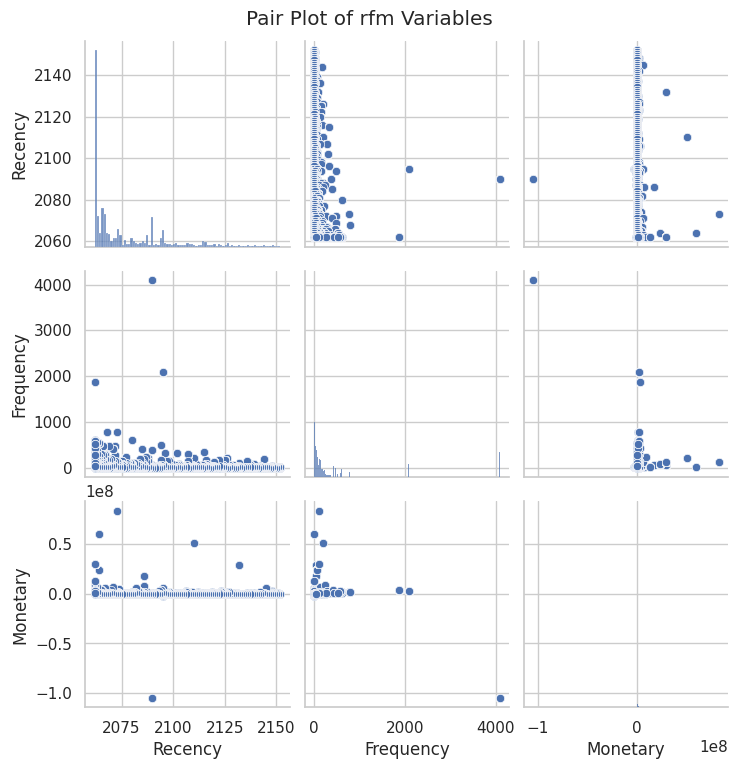

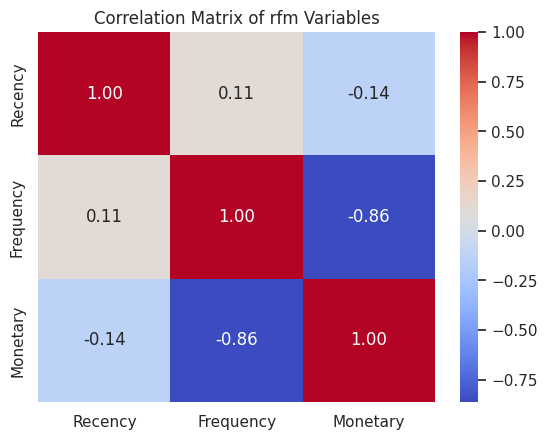

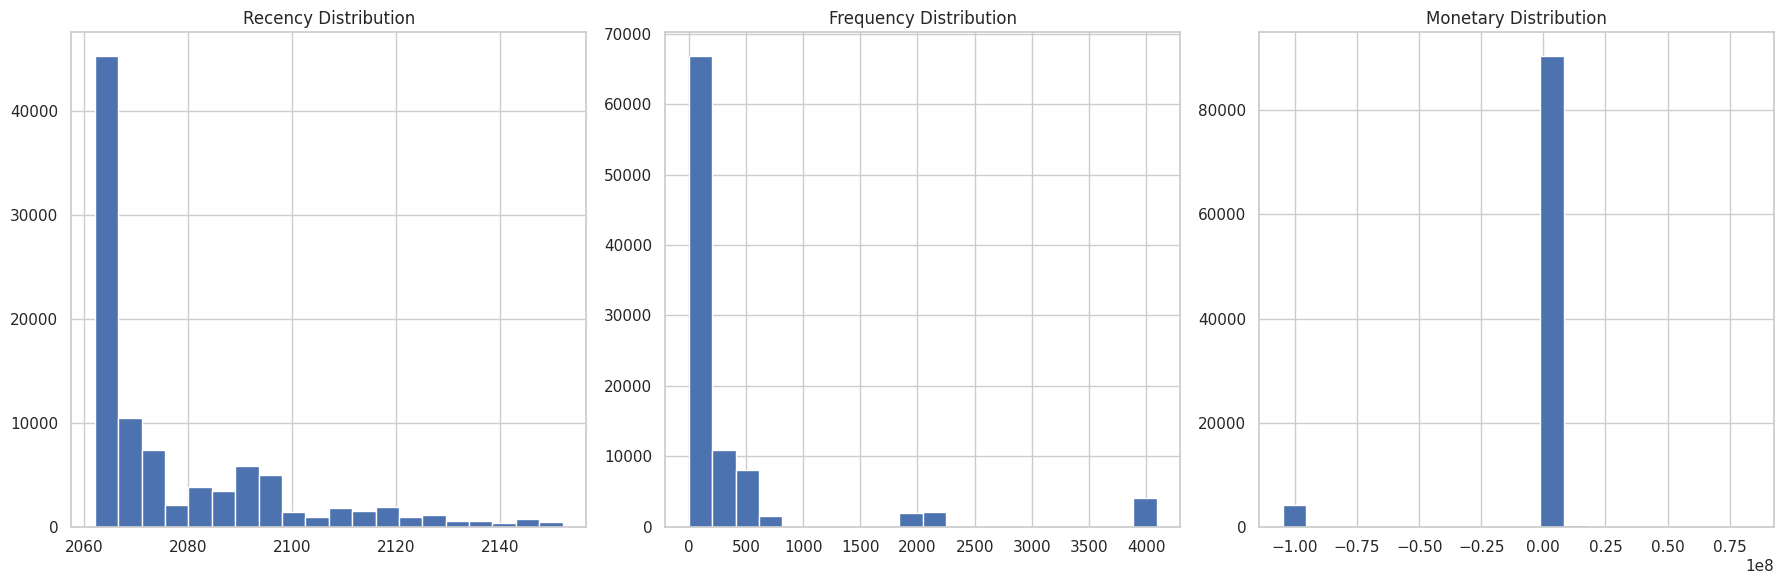

In [26]:
# Call the visualization functions
# Ensure rfms_df is defined and contains 'Recency', 'Frequency', 'Monetary', 'Risk_Level'
def visualize_rfm_data():
    """
    Function to run all RFMS visualizations.
    """
    rfm.plot_pairplot()
    rfm.plot_heatmap()
    rfm. plot_histograms()
 
visualize_rfm_data()


Calculate RFM score and assign bad or good labels

In [27]:
# Call the calculate_rfm_scores method to compute the overall RFM score

# Calculate RFM scores
rfm_df_scores = rfm.calculate_rfm_scores(rfm_df)

# Assign labels


# Display the updated rfms_data DataFrame
rfm_df[['CustomerId',	'Recency',	'Frequency',	'Monetary',	'RFM_Score',	'Risk_Label']].head(10)


,CustomerId,Recency,Frequency,Monetary,RFM_Score,Risk_Label
0,CustomerId_4406,2063,119,109921.75,4.00,Good
2,CustomerId_4683,2143,2,1000.00,1.00,Bad
3,CustomerId_988,2067,38,228727.20,4.00,Good
5,CustomerId_1432,2152,1,2000.00,1.00,Bad
6,CustomerId_2858,2067,29,93400.00,4.00,Good
8,CustomerId_598,2150,4,8060.00,1.90,Good
9,CustomerId_1053,2151,7,13788.00,1.90,Good
10,CustomerId_3052,2123,12,10700.00,2.35,Good
16,CustomerId_3105,2062,197,157448.00,4.00,Good
19,CustomerId_3507,2102,11,6350.00,2.45,Good


In [28]:
rfm_df['RFM_Score'].quantile(0.75)

np.float64(3.35)

In [29]:
rfm_df['RFM_Score'].quantile(0.25)

np.float64(1.55)

In [30]:
np.float64(3.35)

NameError: name 'np' is not defined

In [ ]:
rfm_df['RFM_Score'].median()

np.float64(2.35)

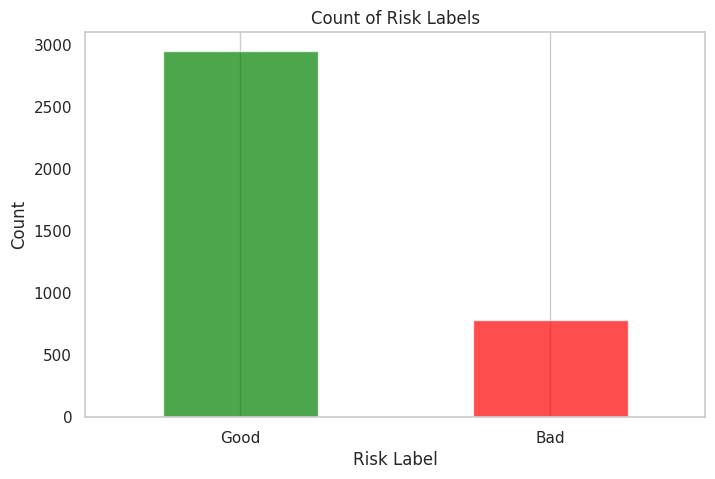

In [31]:
import matplotlib.pyplot as plt
# Count the occurrences of each risk label
risk_counts = rfm_df['Risk_Label'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 5))
risk_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Count of Risk Labels')
plt.xlabel('Risk Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
risk_counts

Risk_Label
Good    47925
Bad     47550
Name: count, dtype: int64

In [ ]:
rfm_df['RFM_Score'].median()

np.float64(2.6)

In [32]:
def visualize_pie_chart(rfms_data):
    """
    Visualizes the distribution of Fraud Result within each Risk Label using pie charts.
    
    Parameters:
    -----------
    rfms_data : pd.DataFrame
        The dataset containing Risk_Label and FraudResult columns.
    """
    risk_labels = rfm_df['Risk_Label'].unique()
    
    plt.figure(figsize=(12, 6))
    
    for i, label in enumerate(risk_labels):
        subset = rfm_df[rfm_df['Risk_Label'] == label]
        fraud_counts = subset['FraudResult'].value_counts()
        
        plt.subplot(1, len(risk_labels), i + 1)
        plt.pie(fraud_counts, labels=['No Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', startangle=90)
        plt.title(f'Fraud Distribution for {label}')
    
    plt.tight_layout()
    plt.show()

# Example call to the pie chart visualization function
visualize_pie_chart(rfm_df)


KeyError: 'FraudResult'

<Figure size 1200x600 with 0 Axes>